In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## restoring dataframes variable
%store -r 
# for dict dataframes which has data for all sensors for past 30 days
from sys import getsizeof
getsizeof(dataframes)

%config InlineBackend.figure_format = 'retina'

In [53]:
sensors = list(dataframes.keys())

In [71]:
for sensor in sensors[:1]:
    data = dataframes[sensor]
    #data['time'] = pd.to_datetime(data['time'])
    
    data['Data Available'] = data['batt_v'].notnull()  # Create a new column indicating data availability
    data['Data Available'] = data['Data Available'].astype(int)
    
    
    #plt.scatter(data['time'], data['Data Available'], marker='o', linestyle='-')
    
    datas = data[['time', 'Data Available']][:5]
    binary_matrix = datas['Data Available'].values.reshape(1, -1)
    
    print(binary_matrix)

#     plt.figure(figsize=(100, 5))  # Set the size of the plot
#     plt.imshow(binary_matrix, cmap='binary', aspect='auto')
    
    # plt.xlabel('Timestamp')
    # plt.xticks(ticks=range(len(datas)), labels=datas['time'])
    # plt.yticks([])
    
    kpi_transposed = data.transpose() # convert column to row for plotting horizontally
    rdgn = sns.diverging_palette(h_neg=130, h_pos=10, s=99, l=55, sep=3, as_cmap=True)
    sns.heatmap(kpi_transposed, linecolor='white', linewidths=1.3,vmin=0, vmax=1, cmap=rdgn, cbar=False)
    plt.show()
    
    
# #     # Create the heatmap
# #     plt.figure(figsize=(10, 6))  # Set the size of the plot
# #     sns.heatmap(data[['time','Data Available']], cmap='binary', cbar=True)

# # #     plt.title('Data Availability Heatmap')  # Set the title of the plot
# # #     plt.xlabel('Timestamp')  # Set the x-axis label

# #     df = data[['time','Data Available']]
    
# #     sns.heatmap(df.pivot('time','Data Available'), cmap='binary', cbar=False)
    
#     binary_matrix = np.zeros((len(data), 1))
#     binary_matrix[data['batt_v'] == 1] = 1
    
#     # Create the heatmap
#     plt.figure(figsize=(6, len(df)))  # Set the size of the plot
#     plt.imshow(binary_matrix, cmap='binary', aspect='auto')

#     plt.title('Binary Value Heatmap')  # Set the title of the plot
#     plt.xlabel('Value')  # Set the x-axis label


[[1 1 1 1 1]]


TypeError: float() argument must be a string or a number, not 'Timestamp'

[[1 0 1 1]]


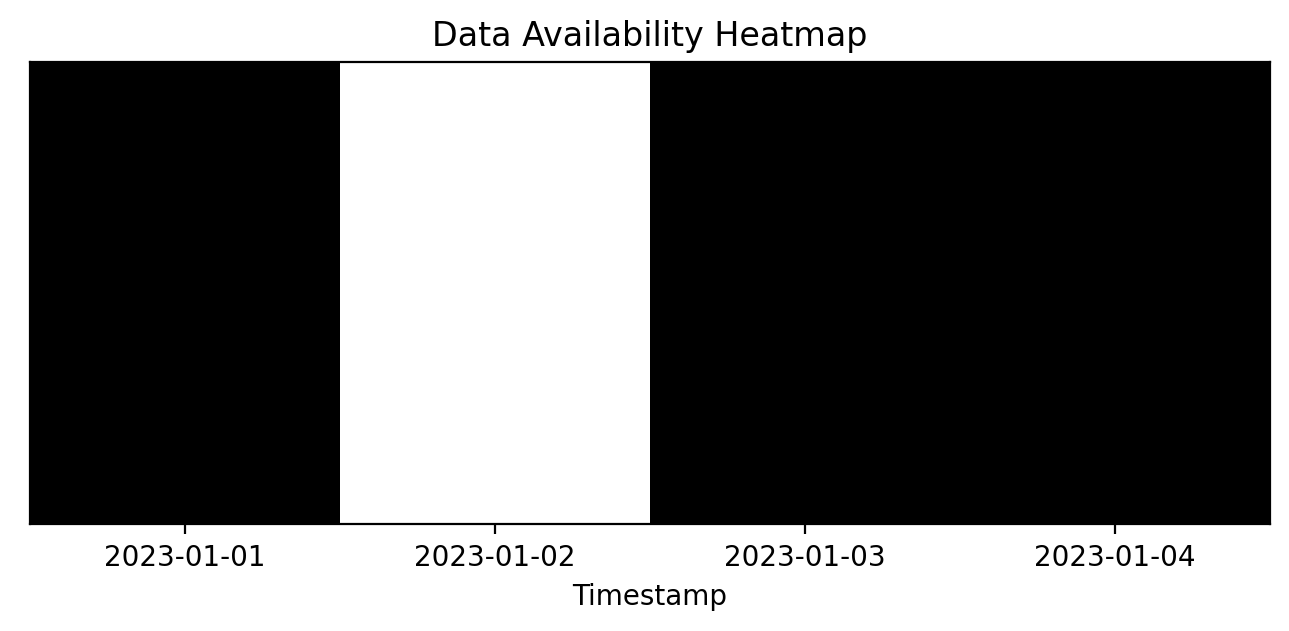

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with timestamp and binary column
data = {
    'Timestamp': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04'],
    'Binary': [1, 0, 1, 1]
}

df = pd.DataFrame(data)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert 'Timestamp' column to datetime type

# Create a binary matrix to represent data availability
binary_matrix = df['Binary'].values.reshape(1, -1)

print(binary_matrix)
# Create the heatmap
plt.figure(figsize=(8, 3))  # Set the size of the plot
plt.imshow(binary_matrix, cmap='binary', aspect='auto')

# Customize the axis labels
plt.xlabel('Timestamp')
plt.xticks(ticks=range(len(df)), labels=df['Timestamp'].dt.date)
plt.yticks([])

plt.title('Data Availability Heatmap')  # Set the title of the plot

plt.show()  # Show the plot